## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [3]:
df = pd.read_excel("WTI.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,WTI,WTI_LAG1,WTI_LAG2,WTI_LAG3,WTI_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.028554,0.095448,0.084944,0.016658,-0.077023,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.095448,0.084944,0.016658,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.028554,0.095448,0.084944,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.099040,0.028554,0.095448,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.006551,-0.135538,-0.080447,0.099040,0.028554,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.198614,0.091224,0.068518,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.141561,0.198614,0.091224,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,-0.153171,0.141561,0.198614,0.015792,1.58,1.38,0.005921,1,1


In [4]:
y = df['WTI']
X = df[["WTI_LAG1","WTI_LAG2","WTI_LAG3","WTI_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.159
Date:                Sat, 13 Jan 2024   Prob (F-statistic):            0.00152
Time:                        14:10:52   Log-Likelihood:                 59.495
No. Observations:                 109   AIC:                            -96.99
Df Residuals:                      98   BIC:                            -67.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [5]:
selected_columns = ["WTI","WTI_LAG1","USAGDP","Infectious Disease Tracker","COV19","RUWAR"]#,
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,WTI,WTI_LAG1,USAGDP,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,
1996-07-01,0.028554,0.095448,0.020675,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.012196,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.015662,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.012380,0.782759,0,0
1997-07-01,-0.006551,-0.135538,0.018502,0.041964,0,0
...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.020373,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.017477,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,0.015792,0.005921,1,1


In [6]:
# Separating the dependent variable
y = pruned_df.iloc[:, 0].values.reshape(-1, 1)
X = pruned_df.iloc[:, 1:].values

# Scaling only the dependent variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])

# Manually splitting data into train and test sets without shuffling
split_index = int(0.93 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

In [7]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units=40, return_sequences=True))

model.add(LSTM(units=400, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=150, batch_size=48, verbose=0)

In [8]:
# Making predictions
predictions = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


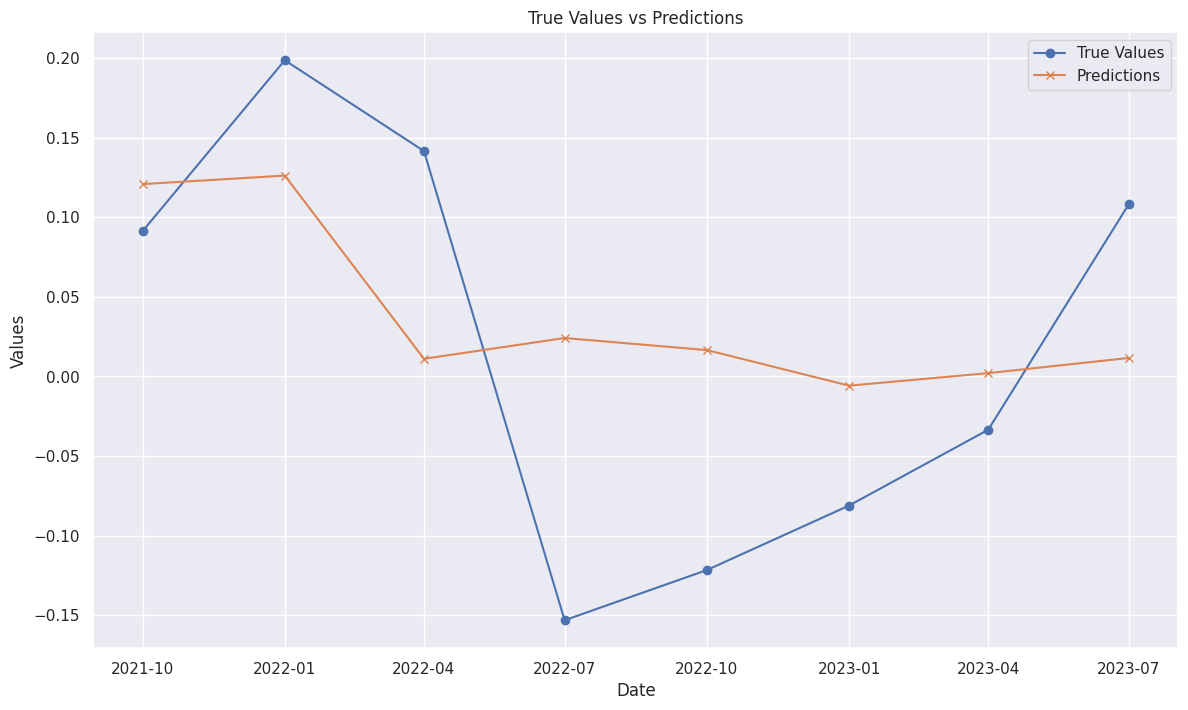

In [9]:
# Inverting the scaling for y_test and predictions
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()


# Plotting the true values and the predictions
plt.figure(figsize=(14, 8))
test_dates = df.index[len(pruned_df) - len(y_test):]
plt.plot(test_dates, y_test, label='True Values', marker='o')
plt.plot(test_dates, predictions, label='Predictions',  marker='x')
plt.title('True Values vs Predictions')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [10]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.0944
MAPE: 84.8424 %
MSE: 0.0112
RMSE: 0.1060


## Saving Prediction

In [11]:
df = pd.DataFrame({'WTI Q LSTM': predictions, 'Actual': y_test})
df.to_excel("WTI_Q_LSTM_forecast.xlsx", index=True)
df

,WTI Q LSTM,Actual
0,0.120802,0.091224
1,0.126162,0.198614
2,0.011059,0.141561
3,0.024121,-0.153171
4,0.016552,-0.121634
5,-0.005804,-0.081122
6,0.002065,-0.033490
7,0.011606,0.108301


In [12]:
# Open a file in write mode
with open('WTI Q LSTM Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')